<a href="https://colab.research.google.com/github/AsadovDovud/Data_Science_Projects/blob/main/Continue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# Building pipline and use automate it
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
# For Checking
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler

# Reading Files

In [215]:
ls = pd.read_excel('/content/life_satis.xlsx')
gdp = pd.read_csv('/content/gdp_coutries.csv')

In [216]:
ls.head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN
1,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.2,NaN,NaN


In [217]:
gdp.head(2)

,Unnamed: 0,country,1980,1981,1982,1983,1984,1985,1986,1987,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,...,2543.142,2459.197,1990.994,no data,no data,no data,no data,no data,no data,no data
1,2,Albania,2155.361,2444.301,2614.754,2689.389,2783.011,2770.393,2927.299,2916.869,...,14450.533,14171.034,16154.029,18164.426,19566.008,20739.093,21953.473,23230.392,24563.824,25985.292


# Preparing Data

In [218]:
gdp = gdp.drop('Unnamed: 0', axis=1)

In [219]:
ls = ls[['Country', 'Value']]

In [220]:
gdp = gdp[['country', '2022']]

In [221]:
gdp.head(2)

,country,2022
0,Afghanistan,no data
1,Albania,18164.426


In [222]:
ls.head(2)

,Country,Value
0,Australia,7.1
1,Austria,7.2


In [223]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  226 non-null    object
 1   2022     226 non-null    object
dtypes: object(2)
memory usage: 3.7+ KB


In [224]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  38 non-null     object 
 1   Value    38 non-null     float64
dtypes: float64(1), object(1)
memory usage: 736.0+ bytes


In [225]:
gdp = gdp[gdp.country.isin(ls.Country)]

In [226]:
ls = ls[ls.Country.isin(gdp.country)]

In [227]:
ls.columns = ['country', 'value']

# Merging columns

In [228]:
df = pd.merge(gdp, ls, how='outer')

In [229]:
df.columns=['country', 'gdp2022', 'value']

In [230]:
df = df.astype({'gdp2022':'float'})

In [231]:
df['gdp2022'] = df['gdp2022']/1000

In [232]:
df['gdp2022'] = df['gdp2022'].astype('int')

In [233]:
df = df.sort_values(by=['gdp2022'])

In [234]:
df

,country,gdp2022,value
28,South Africa,15,4.9
3,Brazil,18,6.1
20,Mexico,23,6.0
5,Chile,29,6.2
11,Greece,37,5.8
18,Latvia,39,6.2
26,Slovak Republic,40,6.5
12,Hungary,42,6.0
25,Portugal,42,5.8
24,Poland,43,6.1


# Visualisation

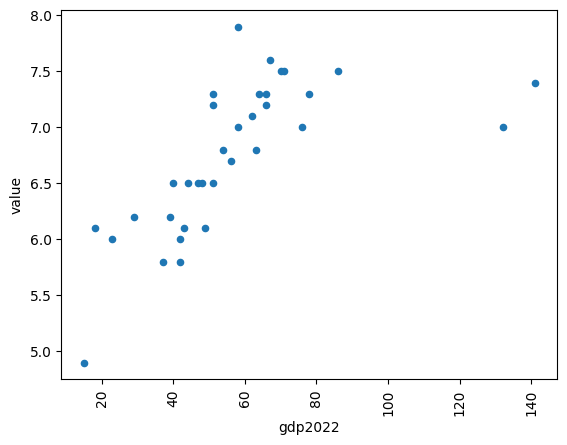

In [235]:
df.plot(kind='scatter', x='gdp2022', y='value')
plt.xticks(rotation=90)
plt.show()

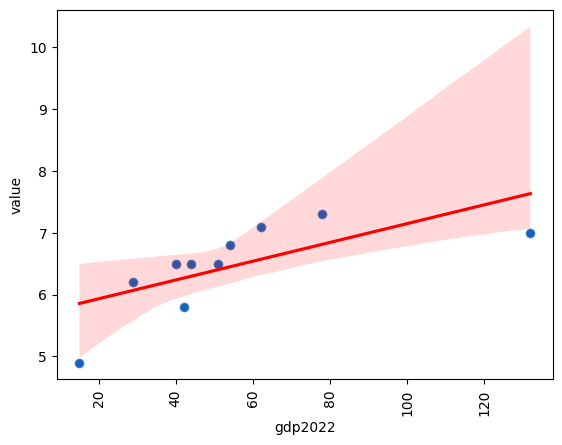

In [248]:
df.plot(kind='scatter', x='gdp2022', y='value', color='b')
plt.xticks(rotation=90)
sns.regplot(df, x='gdp2022', y='value', line_kws={'color':'red'})
plt.show()

In [237]:
x = np.asanyarray(df[['gdp2022']])
y = np.asanyarray(df[['value']])

In [238]:
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

In [239]:
LR_model = LinearRegression()
LR_model.fit(x,y)

LinearRegression()

In [240]:
df = df.sample(10)

In [241]:
x2 = np.asanyarray(df[['gdp2022']])
y2 = np.asanyarray(df[['value']])

In [242]:
min_max_scaler = MinMaxScaler()
x2 = min_max_scaler.fit_transform(x2)

In [243]:
value2 = LR_model.predict(x2)

In [244]:
y2 = y2.ravel()
y2.ndim

1

In [245]:
value2 = value2.ravel()
value2.ndim

1

In [246]:
pd.DataFrame({'Prognoz':value2, 'Real baxosi': y2})

,Prognoz,Real baxosi
0,6.034826,4.9
1,6.486045,6.5
2,6.558240,6.5
3,6.738728,6.8
4,7.171899,7.3
5,6.287509,6.2
6,6.883119,7.1
7,6.522143,5.8
8,8.146533,7.0
9,6.684582,6.5


In [247]:
lin_mse = mean_squared_error(value2, y2)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.5688914562870938
